In [1]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
from pathlib import Path
from FKMC.jobmanager import *

In [3]:
config = dict(
              mcmc_routine='quantum_cython_mcmc',
              N_steps = 100,
              bins = 1,
              N_burn_in = 20,
              N_system = np.array([64,128]),
              mu = 0,
              beta = np.array([0.6,0.8,0.9,1.0,1.2]),
              U = np.array([5]),
              V = -1,
              alpha= 1.5,
              outer_loop = np.array(['N_system'], dtype=h5py.special_dtype(vlen=str)),
              inner_loop = np.array(['U','beta'], dtype=h5py.special_dtype(vlen=str)),
              quantum = True,
              output_history = False,
              output_correlator = False,
              output_state = False,
              energy_max = 8,
              energy_min = -8,
              N_energy_bins = 200,
            )

working_dir = Path('../data/test')
setup_mcmc(config, working_dir, overwrite = True)

config = read_config_file(working_dir)
config

INFO:FKMC.jobmanager:Working in: ../data/test
INFO:FKMC.jobmanager:Sample results:
INFO:FKMC.jobmanager:flag_6: array(shape=(2,), dtype=int64)
INFO:FKMC.jobmanager:classical_energies_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:numbers_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:magnetisations_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:quantum_energies_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:classical_energies_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:numbers_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:magnetisations_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:quantum_energies_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:q_energy_histogram: array(shape=(200,), dtype=float64)
INFO:FKMC.jobmanager:IPR_histogram: array(shape=(200,), dtype=float64)
INFO:FKMC.jobmanager:q_energy_histogram_bins: array(shape=(201,), dtype=

/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/FKMC/stats.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.sqrt(np.mean(np.split(O, M), axis = -1).var(ddof = 1) / M)
/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'mcmc_routine': 'quantum_cython_mcmc',
 'N_steps': 100,
 'bins': 1,
 'N_burn_in': 20,
 'N_system': array([ 64, 128]),
 'mu': 0,
 'beta': array([0.6, 0.8, 0.9, 1. , 1.2]),
 'U': array([5]),
 'V': -1,
 'alpha': 1.5,
 'outer_loop': array(['N_system'], dtype=object),
 'inner_loop': array(['U', 'beta'], dtype=object),
 'quantum': True,
 'output_history': False,
 'output_correlator': False,
 'output_state': False,
 'energy_max': 8,
 'energy_min': -8,
 'N_energy_bins': 200}

In [4]:
%%time
from FKMC.jobmanager import outer_loop_shape
logging.getLogger().setLevel(logging.INFO)

working_dir = Path('../data/test')
config = read_config_file(working_dir)
outer_job_length = outer_loop_shape(config).prod()

for job_id in range(outer_job_length):
    run_mcmc(job_id, working_dir = working_dir, overwrite = True)
print('DONE!')

INFO:FKMC.jobmanager:job_id: 0
INFO:FKMC.jobmanager:This jobs outer_config is {'N_system': 64, 'outer_loop_index': 0, 'outer_loop_indices': (0,)}
INFO:FKMC.jobmanager:Starting MCMC routine <built-in function quantum_cython_mcmc> inner loop
INFO:FKMC.jobmanager:Since it's the first one, creating the datasets:
INFO:FKMC.jobmanager:Done: Inner Job: 0 indices: (0, 0) runtime: 2.59 seconds


/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/FKMC/stats.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.sqrt(np.mean(np.split(O, M), axis = -1).var(ddof = 1) / M)
/workspace/tch14/conda-envs/cmth_intelpython3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


INFO:FKMC.jobmanager:Done: Inner Job: 1 indices: (0, 1) runtime: 2.50 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 2 indices: (0, 2) runtime: 2.49 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 3 indices: (0, 3) runtime: 2.50 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 4 indices: (0, 4) runtime: 2.48 seconds
INFO:FKMC.jobmanager:MCMC routine finished after 12.57 seconds
INFO:FKMC.jobmanager:job_id: 1
INFO:FKMC.jobmanager:This jobs outer_config is {'N_system': 128, 'outer_loop_index': 1, 'outer_loop_indices': (1,)}
INFO:FKMC.jobmanager:Starting MCMC routine <built-in function quantum_cython_mcmc> inner loop
INFO:FKMC.jobmanager:Since it's the first one, creating the datasets:
INFO:FKMC.jobmanager:Done: Inner Job: 0 indices: (0, 0) runtime: 18.08 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 1 indices: (0, 1) runtime: 17.64 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 2 indices: (0, 2) runtime: 17.42 seconds
INFO:FKMC.jobmanager:Done: Inner Job: 3 indices: (0, 3) runtime: 17.12 second

In [5]:
%%time
#the problem is that the correlator is a different shape for each value of N_system,

import logging
logging.getLogger().setLevel(logging.INFO)

gather_mcmc(working_dir, do_all = True)

INFO:FKMC.jobmanager:copied_in wasn't in config, initialising it
INFO:FKMC.jobmanager:Number of Jobs to copy in: 2
INFO:FKMC.jobmanager:Job IDs: [0 1]...
INFO:FKMC.jobmanager:missing : []
INFO:FKMC.jobmanager:Jobs attempted this time: 2
INFO:FKMC.jobmanager:Overall completion: 2 / (2, 5)
INFO:FKMC.jobmanager:File size: 0.00Gb
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 50 ms


['IPR_histogram', 'classical_energies_moments', 'classical_energies_moments_err', 'flag_6', 'magnetisations_moments', 'magnetisations_moments_err', 'numbers_moments', 'numbers_moments_err', 'q_energy_bounds', 'q_energy_histogram', 'q_energy_histogram_bins', 'quantum_energies_moments', 'quantum_energies_moments_err', 'runtime']
['N_system']
['U' 'beta']


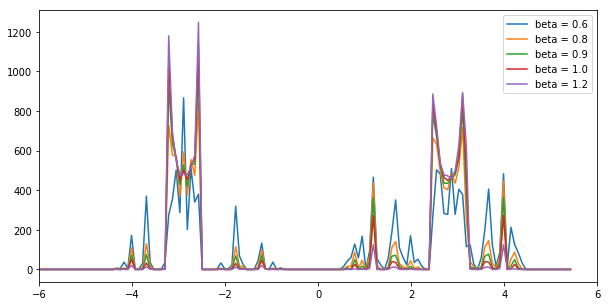

In [7]:
class objectview(object):
    def __init__(self, dict_like):
        self.dict_like = dict_like

    def __getattr__(self, name):
        return self.dict_like[name]

result_filename = working_dir / 'results.hdf5'
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        
        print(list(data.keys()))
        print(data.attrs['outer_loop'])
        print(data.attrs['inner_loop'])
        
        betas = data.attrs['beta']
    
        f, axes = plt.subplots(1,1, figsize = (10,5))
        for i,beta in enumerate(betas):
            axes.plot(r.q_energy_histogram_bins[-1,0,i,:-1] - config.U/2,  r.q_energy_histogram[-1,0,i], label = f'beta = {beta}')
        axes.legend()
        axes.set(xlim=(-6,6))

In [ ]:
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        print(print([dim.label for dim in r.numbers_moments.dims]))

        f, axes = plt.subplots(config.beta.size,1, figsize = (10,10), sharex = 'col')
        for j,beta in enumerate(config.beta):
            for i,N in enumerate(config.N_system):
                axes[j].plot(r.q_energy_histogram_bins[i,0,j,:-1]  - config.U/2,  r.q_energy_histogram[i,0,j,:], label = N)
                axes[j].set(title = f'{beta}', xlim = (-4,4))
        axes[0].legend()
        #axes.set(ylim=(-1,100))